In [1]:
%run Package_AND_Parameter.ipynb
%run Features_Calculation.ipynb 

C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [93]:
df_s1 = pd.read_csv('Dataframe_S1.csv')['0']
df_rem = pd.read_csv('Dataframe_REM.csv')['0']
print("Len(s1):",len(df_s1))
print("Len(rem):",len(df_rem))

Len(s1): 7080000
Len(rem): 21300000


In [94]:
def ssa_criteria(s, thr=0.05):
    sums = sum(s)
    idx = 0

    while (sum(s[:idx + 1]) / sums) < 0.9:
        idx += 1
    subs = s[idx + 1:]

    dif = abs(subs[:-1] - subs[1:])
    dif_sort = np.sort(dif)
    difm = np.argwhere(dif == dif_sort[0])[0][0]
    lambdaj = subs[difm]
    lambdaset = subs[(subs < lambdaj / (1 - thr)) & (subs > lambdaj /
                                                     (1 + thr))]

    lambdaset_i = []
    for l in lambdaset:
        lambdaset_i.append(np.argwhere(s == l)[0][0])

    return lambdaset_i

def ssa_criteria2(s, thr = 0.05):
    sums = sum(s)
    
    i = 1
    while (sum(s[len(s)-i :len(s)]) / sums) < thr:
        i += 1
    
    return list(range(len(s)-i-1-5,len(s)-i-1))

def ssa_criteria3(s, thr = 0.9):
    sums = sum(s)
    
    idx = 0
    while (sum(s[:idx + 1]) / sums) < thr:
        idx += 1
    
    return list(range(idx))

## SSA

In [111]:
ssa_s1 = []
for i in tqdm(range(0,len(df_s1),3000)):
    pc,s,v = ssa_core.ssa(df_s1[i:i+3000],dim=200)
    resc = ssa_core.inv_ssa(pc,v,ssa_criteria2(s,thr=0.05))
    ssa_s1.append(resc)
ssa_rem = []
for i in tqdm(range(0,len(df_rem),3000)):
    pc,s,v = ssa_core.ssa(df_rem[i:i+3000],dim=200)
    resc = ssa_core.inv_ssa(pc,v,ssa_criteria2(s,thr=0.05))
    ssa_rem.append(resc)

100%|██████████████████████████████████████████████████████████████████████████████| 7100/7100 [05:08<00:00, 23.03it/s]


## Feature

100%|███████████████████████████████████████████████████████████████████████████| 7100/7100 [00:00<00:00, 36863.19it/s]


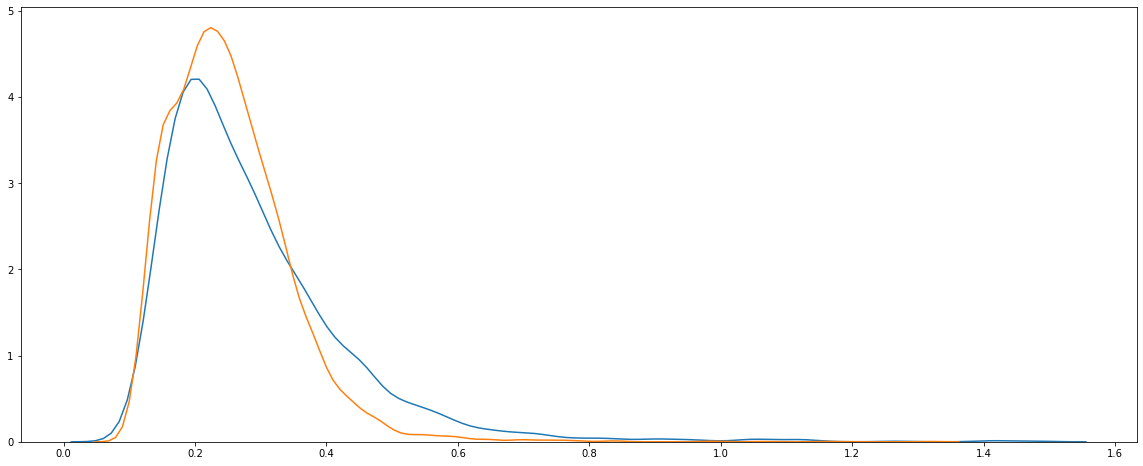

In [112]:
feature_s1 = []
feature_rem = []

for ssa1 in tqdm(ssa_s1):
    feature_s1.append(np.std(ssa1))
for ssar in tqdm(ssa_rem):
    feature_rem.append(np.std(ssar))
    
plt.figure(figsize=(20,8))
sns.kdeplot(feature_s1)
sns.kdeplot(feature_rem)

100%|████████████████████████████████████████████████████████████████████████████| 7100/7100 [00:00<00:00, 8713.54it/s]


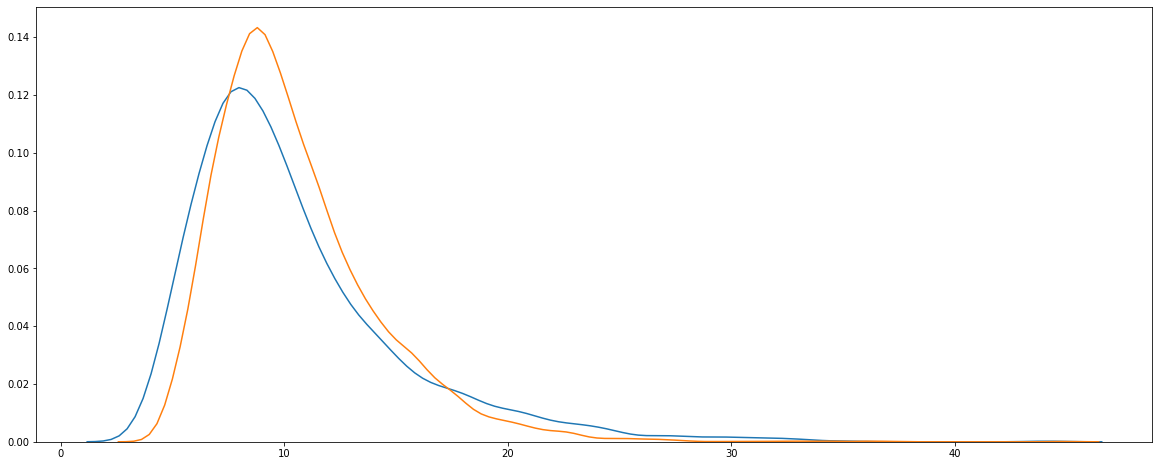

In [99]:
feature_s1 = []
feature_rem = []
for i in tqdm(range(0,len(df_s1),3000)):
    feature_s1.append(np.std(df_s1[i:i+3000]))
    
for i in tqdm(range(0,len(df_rem),3000)):
    feature_rem.append(np.std(df_rem[i:i+3000]))
    
plt.figure(figsize=(20,8))
sns.kdeplot(feature_s1)
sns.kdeplot(feature_rem)

## Encoding

In [119]:
y1 = [0]*2360
yr = [3]*7100

x = np.array(feature_s1 + feature_rem).reshape(len(x),1)
y = np.array(y1 + yr).reshape(len(y),1)

In [116]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model  import LogisticRegression

In [121]:
#clf = LinearDiscriminantAnalysis()
clf = GaussianNB()
#clf = LogisticRegression('l2')
trx = StandardScaler().fit_transform(x)
print(cross_val_score(clf,X = trx,y = y,cv = StratifiedKFold(shuffle=True,n_splits=5)))

C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vita7\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.75422833 0.76374207 0.75105708 0.75369979 0.75845666]
